In [22]:
import hypothesis as h
import numpy as np
import torch
import glob

from hypothesis.nn.ratio_estimation import RatioEstimatorEnsemble
from ratio_estimation import load_estimator
from ratio_estimation import DatasetJointTest as Dataset
from util import coverage

In [2]:
h.plot.activate()

In [27]:
@torch.no_grad()
def coverage_of_ensemble(n, budget=1024, cl_list=[0.95], max_samples=2500):
    weights = glob.glob("output/" + str(budget) + "/without-regularization/mlp-0*/weights.th")
    paths = np.random.choice(weights, n, replace=False)
    estimators = []
    for path in paths:
        estimators.append(load_estimator(path))
    ensemble = RatioEstimatorEnsemble(estimators)
    d = Dataset()
    if max_samples is None:
        inputs = d[:]["inputs"]
        outputs = d[:]["outputs"]
    else:
        inputs = d[:max_samples]["inputs"]
        outputs = d[:max_samples]["outputs"]
    alphas = [1 - cl for cl in cl_list]
    empirical_coverage = coverage(ensemble, inputs, outputs, alphas, flow_sbi=False)
    
    return empirical_coverage

IndexError: list index out of range

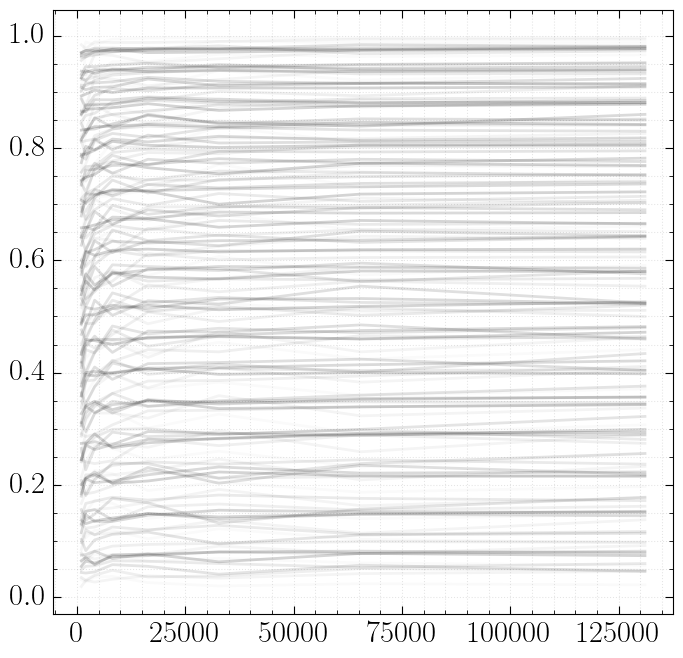

In [67]:
for i, n_ensembles in enumerate(num_ensembles):
    c = []
    for j, budget in enumerate(budgets):
        c.append(coverages[i][j][0])
    plt.plot(budgets, c, label=str(n_ensembles), c="C0", alpha=(i+1)/len(num_ensembles))
    
plt.show()

In [ ]:
levels = [x/20 for x in range(1, 20)]
num_ensembles = [x for x in range(2, 50, 1)]
budgets = [2**x for x in range(10,18)]
coverages = []
for budget in budgets:
    x = []
    for n in num_ensembles:
        attempts = []
        for attempt in range(3):
            attempts.append(coverage_of_ensemble(n, budget=budget, cl_list=levels, max_samples=1000))
        x.append(attempts)
    coverages.append(x)

Coverages evaluated:  13%|█▎        | 134/1000 [00:09<01:02, 13.91it/s]

In [86]:
coverages[0][0]

[[0.031,
  0.063,
  0.111,
  0.153,
  0.201,
  0.242,
  0.294,
  0.352,
  0.413,
  0.45,
  0.505,
  0.57,
  0.642,
  0.706,
  0.763,
  0.819,
  0.87,
  0.908,
  0.962],
 [0.017,
  0.049,
  0.092,
  0.128,
  0.157,
  0.203,
  0.241,
  0.296,
  0.344,
  0.409,
  0.47,
  0.551,
  0.624,
  0.684,
  0.759,
  0.811,
  0.866,
  0.917,
  0.959],
 [0.025,
  0.058,
  0.089,
  0.12,
  0.166,
  0.218,
  0.267,
  0.318,
  0.366,
  0.425,
  0.481,
  0.564,
  0.634,
  0.707,
  0.775,
  0.837,
  0.893,
  0.936,
  0.972]]

In [29]:
import matplotlib.pyplot as plt

In [50]:
opacities = np.linspace(0.2, 1, len(num_ensembles))

In [79]:
len(coverages[0][0])

3

In [99]:
coverages[0][0][:]

[[0.031,
  0.063,
  0.111,
  0.153,
  0.201,
  0.242,
  0.294,
  0.352,
  0.413,
  0.45,
  0.505,
  0.57,
  0.642,
  0.706,
  0.763,
  0.819,
  0.87,
  0.908,
  0.962],
 [0.017,
  0.049,
  0.092,
  0.128,
  0.157,
  0.203,
  0.241,
  0.296,
  0.344,
  0.409,
  0.47,
  0.551,
  0.624,
  0.684,
  0.759,
  0.811,
  0.866,
  0.917,
  0.959],
 [0.025,
  0.058,
  0.089,
  0.12,
  0.166,
  0.218,
  0.267,
  0.318,
  0.366,
  0.425,
  0.481,
  0.564,
  0.634,
  0.707,
  0.775,
  0.837,
  0.893,
  0.936,
  0.972]]

In [107]:
nominal_cl

0.9

In [ ]:
colors = ["#279AF1", "#298bd8", "#2a80c6", "#2a75b5", "#285f92", "#213e5c", "#172331",  "#000000"]

In [111]:
from matplotlib import cm
viridis = cm.get_cmap('viridis', len(budgets))
colors = viridis.colors[::-1]

In [160]:
from matplotlib.ticker import FormatStrFormatter

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(24, 24))

index = -1
for row in axes:
    for ax in row:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        nominal_cl = levels[index]
        ax.set_xlim([0, 50])
        plot_coverage(ax, index)
        index -= 1
        
ax = axes[3][0]
handles, labels = ax.get_legend_handles_labels()
ax.set_ylabel("Empirical coverage probability")
ax.set_xlabel("Ensemble size")

fig.legend(handles, labels, loc=(0.07, 0.035),
          fancybox=True, shadow=False, ncol=9)
plt.savefig("coverage_ensemble_size.pdf")
plt.show()

In [187]:
!pwd

/home/jhermans/projects/troubles-in-sbi/workflows/ensembles_vs_individual/slcp


In [132]:
len(levels)

19

In [141]:
4 * 4

16

In [166]:
def plot_coverage(ax, index):
    nominal_index = index
    nominal_cl = levels[nominal_index]
    for budget_index, budget in enumerate(budgets):
        c = colors[budget_index]
        data = []
        for index_n, n in enumerate(num_ensembles):
            attempts = []
            for attempt in range(3):
                attempts.append(coverages[budget_index][index_n][attempt][nominal_index])
            coverage = np.mean(attempts)
            data.append(coverage)
        ax.plot(num_ensembles, data, label=budget, color=c)
    ax.set_title(r"$1-\alpha =$ " + str(nominal_cl))
    ax.axhline(nominal_cl, linestyle=':', c="C0", label=r"$1-\alpha$")